# __Data Exploration with Pandas__

### [Data Grouping and aggregation.](#Data_grouping_and_aggregation)
* Introduction to Data Grouping
* Groupby Objects
* Introduction to Data Aggregation
* mean(), sum(), min(), max(), count()
* Groupby.agg()
* Pivot_table()

### [Merging Datasets.](#Merging_Datasets)
* Concat()
* Merge()

### [Data transformation](#transforming_datasets)
* series.map()
* series.apply()
* df.applymap()
---

<a id='Data_grouping_and_aggregation'></a>

### *Data grouping and Aggregation*

DATA GROUPING

INTRODUCTION 

The GroupBy object enables us split our dataFrame into groups. Calling only the Groupby object returns the pandas core dataframe. Nothing actually gets computed until a function is called on the GroupBy object.
The groupby object makes our code faster, easier to read and more flexible.


Let's practice.

In [74]:
#let's import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
print("successful")

successful


In [14]:
#let's load the data
path = "C:/Users/chiso/OneDrive/Documents/health_dataset.xlsx"
df = pd.read_excel(path)  
df.head() 

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

In [16]:
#let's drop the columns that we won't be needing
df.drop(columns = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number", "Medication"], inplace = True)
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Billing Amount,Admission Type,Discharge Date,Test Results
0,81,Female,O-,Diabetes,2022-11-17,37490.983364,Elective,2022-12-01,Inconclusive
1,35,Male,O+,Asthma,2023-06-01,47304.064845,Emergency,2023-06-15,Normal
2,61,Male,B-,Obesity,2019-01-09,36874.896997,Emergency,2019-02-08,Normal
3,49,Male,B-,Asthma,2020-05-02,23303.322092,Urgent,2020-05-03,Abnormal
4,51,Male,O-,Arthritis,2021-07-09,18086.344184,Urgent,2021-08-02,Normal


In [17]:
#let's check for missing values
df.isnull().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Date of Admission    0
Billing Amount       0
Admission Type       0
Discharge Date       0
Test Results         0
dtype: int64

Great! there are no missing values, now let's check for duplicates

In [18]:
#checking for duplicates
df.duplicated().sum()

0

There are no duplicates, now let's delve into Data grouping and aggregation.

In [38]:
#let's check for unique blood type  in the blood type column
blood_types = list(df["Blood Type"].unique())
print(blood_types)

#checking the count of each blood type
blood_typecount = df["Blood Type"].value_counts()
blood_typecount


['O-', 'O+', 'B-', 'AB+', 'A+', 'AB-', 'A-', 'B+']


Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

We have been able to see the unique blood types and each of their value counts.

We can also do this with one line of code using the `Groupby` object and `.size()`


*Let's do this*

In [40]:
#grouping the data by blood group and checking for the count of each blood type

patients_bloodtype = df.groupby("Blood Type").size()
patients_bloodtype

Blood Type
A+     1241
A-     1238
AB+    1258
AB-    1275
B+     1244
B-     1252
O+     1248
O-     1244
dtype: int64

using groupby object in grouping the data does not return anything when no operation is performed.

In [42]:
grouped_df = df.groupby("Blood Type")
grouped_df

We can see that the groupby operation didn't return anything. This is because we just grouped but didn't perform any operation unlike the previous cell

We can also select specific columns in our dataframe after whith the groupby object

In [47]:
#grouping the data by admission type and checking for the sum of the billing amount for each admission type
admission_bill_s = df.groupby("Admission Type")["Billing Amount"].sum()
print(admission_bill_s)

#grouping the data by admission type and checking for the mean of the billing amount for each admission type
admission_bill_mean = df.groupby("Admission Type")["Billing Amount"].mean()
admission_bill_mean

Admission Type
Elective     8.394132e+07
Emergency    8.319356e+07
Urgent       8.803319e+07
Name: Billing Amount, dtype: float64


Admission Type
Elective     25891.832668
Emergency    24708.511933
Urgent       25960.833557
Name: Billing Amount, dtype: float64

DATA AGGREGATION

INTRODUCTION
Data Aggregation helps us perform one or more aggregate at once on our column. It also takes in functions as parameters.

Since we have seen how to use the groupby object, we will now combine it with the .agg() function for data grouping and aggregation.

*Let's do this*


In [50]:
#using the .agg() method to find the sum and mean of the billing amount for each admission type
mean_and_sum_admissbills = df.groupby("Admission Type")["Billing Amount"].agg(["sum", "mean"])
mean_and_sum_admissbills

,sum,mean
Admission Type,,
Elective,8.394132e+07,25891.832668
Emergency,8.319356e+07,24708.511933
Urgent,8.803319e+07,25960.833557


OR

In [53]:
admissbills = df.groupby("Admission Type")["Billing Amount"]
mean_and_sum_admissbills = admissbills.agg(["sum", "mean"])
mean_and_sum_admissbills

,sum,mean
Admission Type,,
Elective,8.394132e+07,25891.832668
Emergency,8.319356e+07,24708.511933
Urgent,8.803319e+07,25960.833557


The `.agg()` method can also take in functions as its parameter.

In [59]:
#creating a function to find the difference between the maximum and minimum billing amount for each admission type
def min_max_diff(label):
    diff =  label.max() - label.min()
    return diff

#apply the function to the groupby object using .agg()
admissbills = df.groupby("Admission Type")["Billing Amount"].agg(min_max_diff)
admissbills

Admission Type
Elective     48981.556171
Emergency    48995.721446
Urgent       48962.721654
Name: Billing Amount, dtype: float64

Let us now look at Pivot_tables

`.Pivot_tables()` is also a method used in grouping and aggregating data. It is similar to using pivot tables in excel. 

In [68]:
#using pivot tables to find the mean of the billing amount for each admission type
pivot_tables1 = df.pivot_table(values = "Billing Amount", index = "Admission Type")
pivot_tables1


,Billing Amount
Admission Type,
Elective,25891.832668
Emergency,24708.511933
Urgent,25960.833557


In [67]:
#apply the .pivot_table() method to find the mean and sum of the billing amount for each admission type
pivot_tables2 = df.pivot_table(values= "Billing Amount", index = "Admission Type", aggfunc = ["mean", "sum"])
pivot_tables2

,mean,sum
,Billing Amount,Billing Amount
Admission Type,,
Elective,25891.832668,8.394132e+07
Emergency,24708.511933,8.319356e+07
Urgent,25960.833557,8.803319e+07


In [70]:
#adding the margins parameter to the .pivot_table() method
pivot_tables3 = df.pivot_table(values= "Billing Amount", index = "Admission Type", aggfunc = ["mean", "sum"], margins = True)
pivot_tables3

,mean,sum
,Billing Amount,Billing Amount
Admission Type,,
Elective,25891.832668,8.394132e+07
Emergency,24708.511933,8.319356e+07
Urgent,25960.833557,8.803319e+07
All,25516.806778,2.551681e+08


In [72]:
# confirming the mean and sum of the billing amount column to ensure the Accuracy of the pivot table method
print(df["Billing Amount"].sum())
df["Billing Amount"].mean()

255168067.77738398


25516.8067777384

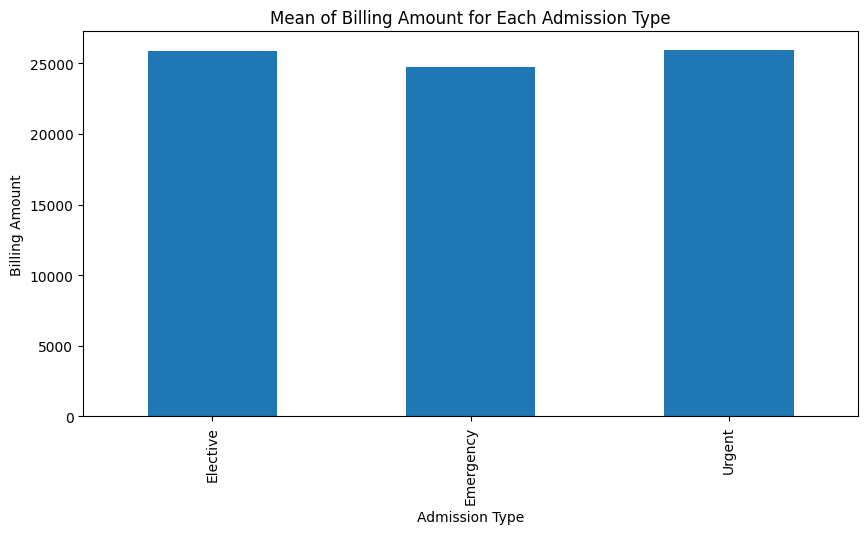

In [78]:
# plotting the pivot table
pivot_tables1.plot(kind = "bar", title = "Mean of Billing Amount for Each Admission Type", xlabel = "Admission Type", ylabel = "Billing Amount", figsize = (10, 5), legend = False)
plt.show()

<a id='merging_datasets'></a>

### *Merging Datasets*

Pandas enables us to work with multiple dataset.
In merging datasets, we can either use the `pd.concat()` or `pd.merge()`

Let's look at each one of them

In [84]:
#reading the data
path1 = "C:/Users/chiso/Downloads/technology.xlsx"
df1 = pd.read_excel(path1)

path2 = "C:/Users/chiso/Downloads/Arts.xlsx"
df2 = pd.read_excel(path2)

path3 = "C:/Users/chiso/Downloads/Science.xlsx" 
df3 = pd.read_excel(path3)

path4 = "C:/Users/chiso/Downloads/Business.xlsx"
df4 = pd.read_excel(path4)

print("successful")


successful


`pd.concat` combines data in two ways. It either combines it stacked/on top of each other (axis = 0) or side by side (axis = 1).


In [89]:
#printing df.info() for each of our dataframes
dfs = [df1, df2, df3, df4]
for df in dfs:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Record ID            595 non-null    object        
 1   Course ID            595 non-null    object        
 2   Enrollment Date      595 non-null    datetime64[ns]
 3   Rating               595 non-null    float64       
 4   Price                595 non-null    int64         
 5   Certificate Awarded  595 non-null    object        
 6   Student ID           595 non-null    object        
 7   Access Type          595 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Record ID       

In [91]:
#combining the dataframes on top of each other
df_combined = pd.concat([df1, df2, df3, df4], axis = 0, ignore_index= True)
df_combined 

,Record ID,Course ID,Enrollment Date,Rating,Price,Certificate Awarded,Student ID,Access Type
0,5669e3ba-31de-4ad2-84d0-a6303072dbfc,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,1.71,87,No,e3d55dec-2b2e-462e-9526-d14bd7d20a72,One-time purchase
1,123e36f9-dd68-485e-a0f0-757c7e4a1ef2,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,4.96,109,Yes,3a8804c6-7dc6-4f4c-943b-42c347920c9f,Subscription
2,35d436fb-3fe8-438e-b598-dbd186fedff8,3eb21864-ccc0-4e73-8128-a66fd71fc659,2019-01-01,2.15,114,Yes,ee3d3ec1-8e30-44d4-9044-0a0b34fd1a63,Subscription
3,8240d981-a4cd-4117-a1ff-0600606b69b7,f4898918-6cda-4e48-9cce-6cf5562dd130,2019-01-01,4.09,150,No,16f27640-dd91-4671-a409-5adfada16db4,Subscription
4,f78686e3-37e1-40d5-b0fb-b33e603bf5d8,f4898918-6cda-4e48-9cce-6cf5562dd130,2019-01-01,4.83,100,Yes,ac87c304-70a2-40aa-809f-ed4793fc2a31,Subscription
...,...,...,...,...,...,...,...,...
1995,979a72c6-0c5d-408c-ac6b-96d49bb1ffe1,8534656a-23bc-4714-973c-8a7829d4f065,2023-12-01,3.61,94,Yes,76fb9c0c-f967-4cb8-a0a1-08c74ea9178b,Subscription
1996,1c8dac2f-df15-4ce4-86be-840f6a9c6445,14a4b44f-bea8-42d7-b263-b48053d58753,2023-12-01,2.57,25,No,1f88075e-e54b-4811-ac9c-01de3d82780a,One-time purchase
1997,1219f115-eab8-456e-a676-0e0fe53686b1,8534656a-23bc-4714-973c-8a7829d4f065,2023-12-01,3.64,38,No,65fa184b-b427-4a2b-8b64-319dae6e10bf,Subscription
1998,64176cc6-a84b-41e7-a0b0-3388b91bf327,f78686e3-37e1-40d5-b0fb-b33e603bf5d8,2023-12-01,3.47,144,No,374f2967-dcbe-4db3-88c4-bac9f911b6e1,Subscription


To combine the data side by side, change the axis parameter to 1 (axis =1)

In [93]:
#checking info for the the combined dataframe.
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Record ID            2000 non-null   object        
 1   Course ID            2000 non-null   object        
 2   Enrollment Date      2000 non-null   datetime64[ns]
 3   Rating               2000 non-null   float64       
 4   Price                2000 non-null   int64         
 5   Certificate Awarded  2000 non-null   object        
 6   Student ID           2000 non-null   object        
 7   Access Type          2000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 125.1+ KB


`pd.merge` is similar to Joins in SQL queries. Unlike `pd.conat`, the merge function only combines data horizontally (axis = 1) and can only combine two dataframes at a time.
The merge function is more flexible and makes use of a KEY which is usually a column common to two different dataframes.


*let's look into this*


In [95]:
#reading the we need for merging data
path5 = "C:/Users/chiso/Downloads/course.xlsx"
course_df = pd.read_excel(path5)
course_df.head()

,Course ID,Course Title,Course Category,Instructor,Course Level
0,b497430f-03af-466d-8deb-8898c2fb30c2,Introduction to Digital Photography: Capturing...,Arts,Drew Jackson,Advanced
1,5669e3ba-31de-4ad2-84d0-a6303072dbfc,Creative Writing Workshop: Crafting Compelling...,Arts,Michelle Richards,Beginner
2,d72b372f-cedf-460e-b771-a28d464b275c,The Art of Watercolor: Techniques for Beginners,Arts,Timothy Simpson,Advanced
3,f4243138-2856-48b2-9731-eec3d6671643,Introduction to Sculpting: From Clay to Bronze,Arts,Randy Petty,Intermediate
4,123e36f9-dd68-485e-a0f0-757c7e4a1ef2,Film Appreciation: Understanding Cinematic Lan...,Arts,Christopher Wood,Intermediate


In [96]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Course ID        35 non-null     object
 1   Course Title     35 non-null     object
 2   Course Category  35 non-null     object
 3   Instructor       35 non-null     object
 4   Course Level     35 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [97]:
#using the pd.merge to merge the combined dataframe with the course dataframe
final_df = pd.merge(left= df_combined, right = course_df, on = "Course ID")
final_df

,Record ID,Course ID,Enrollment Date,Rating,Price,Certificate Awarded,Student ID,Access Type,Course Title,Course Category,Instructor,Course Level
0,5669e3ba-31de-4ad2-84d0-a6303072dbfc,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,1.71,87,No,e3d55dec-2b2e-462e-9526-d14bd7d20a72,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced
1,123e36f9-dd68-485e-a0f0-757c7e4a1ef2,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,4.96,109,Yes,3a8804c6-7dc6-4f4c-943b-42c347920c9f,Subscription,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced
2,ada0c75e-b642-490b-8a78-134ead56acd2,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,2.90,63,No,e3d55dec-2b2e-462e-9526-d14bd7d20a72,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced
3,af952671-2f03-4929-9c1b-a5eb53eb03a5,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-04-01,4.49,33,No,9b4721ce-ccd2-4390-aeb6-f7287d809f81,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced
4,77165be7-531a-43bd-aa83-0d704e733909,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-04-01,3.39,149,Yes,14cd017a-6bef-411a-850f-4c62895380d7,Subscription,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4470e09d-8f53-4c9f-aa2a-13e91fab66b7,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,2.07,172,No,ccfe5220-2db4-4487-a215-6bc03cd648db,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All
1996,a15209ba-8240-4078-8135-3ed42d87c2be,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,2.42,182,Yes,36af5aa4-e8ce-48ae-a528-ca02a0107228,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All
1997,0263ba11-76f5-466f-82f2-7a22238528a0,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,4.61,39,Yes,2c8f8b5c-461b-4946-b1a6-a980aad706d5,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All
1998,7004de49-92b7-46ae-adbc-804c21e2403a,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-10-01,2.99,111,No,cbe7263e-ea4e-487e-a5bd-341a0a50c993,Subscription,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All


In [98]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Record ID            2000 non-null   object        
 1   Course ID            2000 non-null   object        
 2   Enrollment Date      2000 non-null   datetime64[ns]
 3   Rating               2000 non-null   float64       
 4   Price                2000 non-null   int64         
 5   Certificate Awarded  2000 non-null   object        
 6   Student ID           2000 non-null   object        
 7   Access Type          2000 non-null   object        
 8   Course Title         2000 non-null   object        
 9   Course Category      2000 non-null   object        
 10  Instructor           2000 non-null   object        
 11  Course Level         2000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 187.6+ KB


We have different types of Joins
* Inner join : Returns only intersections or rows common to the two dataframes.
* Outer join : returns all the common data in both our dataframes.
* Left join : returns all rows in the left with any row with a common key in the left.
* Right join : returns all rows in the right with any row with a common key in the right.


*let's see an example*

In [101]:
final_df1 = pd.merge( left = df_combined, right = course_df, on = "Course ID", how = "left")
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Record ID            2000 non-null   object        
 1   Course ID            2000 non-null   object        
 2   Enrollment Date      2000 non-null   datetime64[ns]
 3   Rating               2000 non-null   float64       
 4   Price                2000 non-null   int64         
 5   Certificate Awarded  2000 non-null   object        
 6   Student ID           2000 non-null   object        
 7   Access Type          2000 non-null   object        
 8   Course Title         2000 non-null   object        
 9   Course Category      2000 non-null   object        
 10  Instructor           2000 non-null   object        
 11  Course Level         2000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 187.6+ KB


<a id='transforming_datasets'></a>

### *Transforming Datasets*

Data transformation is a crucial process in Data Analysis, Data Science and Machine learning.

In this part, we will be looking at transforming data using Series.map(), Series.apply(), and Dataframe.applymap()

`Series.map()` is used to transform our data and can take in functions as it's parameter.

*let's see this*

In [108]:
def high_or_low(arg):
    if arg > 100:
        return "Expensive"
    elif arg < 100 and arg > 50:
        return "Moderate"
    else:
        return "Cheap"
    
new_df = final_df.Price.map(high_or_low)
new_df.value_counts()
    
    
final_df["Price Category"] = final_df["Price"].map(high_or_low)
final_df

,Record ID,Course ID,Enrollment Date,Rating,Price,Certificate Awarded,Student ID,Access Type,Course Title,Course Category,Instructor,Course Level,Price Category
0,5669e3ba-31de-4ad2-84d0-a6303072dbfc,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,1.71,87,No,e3d55dec-2b2e-462e-9526-d14bd7d20a72,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Moderate
1,123e36f9-dd68-485e-a0f0-757c7e4a1ef2,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,4.96,109,Yes,3a8804c6-7dc6-4f4c-943b-42c347920c9f,Subscription,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Expensive
2,ada0c75e-b642-490b-8a78-134ead56acd2,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,2.90,63,No,e3d55dec-2b2e-462e-9526-d14bd7d20a72,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Moderate
3,af952671-2f03-4929-9c1b-a5eb53eb03a5,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-04-01,4.49,33,No,9b4721ce-ccd2-4390-aeb6-f7287d809f81,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Cheap
4,77165be7-531a-43bd-aa83-0d704e733909,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-04-01,3.39,149,Yes,14cd017a-6bef-411a-850f-4c62895380d7,Subscription,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4470e09d-8f53-4c9f-aa2a-13e91fab66b7,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,2.07,172,No,ccfe5220-2db4-4487-a215-6bc03cd648db,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Expensive
1996,a15209ba-8240-4078-8135-3ed42d87c2be,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,2.42,182,Yes,36af5aa4-e8ce-48ae-a528-ca02a0107228,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Expensive
1997,0263ba11-76f5-466f-82f2-7a22238528a0,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,4.61,39,Yes,2c8f8b5c-461b-4946-b1a6-a980aad706d5,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Cheap
1998,7004de49-92b7-46ae-adbc-804c21e2403a,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-10-01,2.99,111,No,cbe7263e-ea4e-487e-a5bd-341a0a50c993,Subscription,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Expensive


`Series.apply()` works the same way, let's see this

In [109]:
new_df = final_df.Price.apply(high_or_low)
new_df.value_counts()


final_df["Price Category"] = final_df["Price"].apply(high_or_low)
final_df

,Record ID,Course ID,Enrollment Date,Rating,Price,Certificate Awarded,Student ID,Access Type,Course Title,Course Category,Instructor,Course Level,Price Category
0,5669e3ba-31de-4ad2-84d0-a6303072dbfc,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,1.71,87,No,e3d55dec-2b2e-462e-9526-d14bd7d20a72,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Moderate
1,123e36f9-dd68-485e-a0f0-757c7e4a1ef2,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,4.96,109,Yes,3a8804c6-7dc6-4f4c-943b-42c347920c9f,Subscription,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Expensive
2,ada0c75e-b642-490b-8a78-134ead56acd2,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,2.90,63,No,e3d55dec-2b2e-462e-9526-d14bd7d20a72,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Moderate
3,af952671-2f03-4929-9c1b-a5eb53eb03a5,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-04-01,4.49,33,No,9b4721ce-ccd2-4390-aeb6-f7287d809f81,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Cheap
4,77165be7-531a-43bd-aa83-0d704e733909,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-04-01,3.39,149,Yes,14cd017a-6bef-411a-850f-4c62895380d7,Subscription,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4470e09d-8f53-4c9f-aa2a-13e91fab66b7,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,2.07,172,No,ccfe5220-2db4-4487-a215-6bc03cd648db,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Expensive
1996,a15209ba-8240-4078-8135-3ed42d87c2be,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,2.42,182,Yes,36af5aa4-e8ce-48ae-a528-ca02a0107228,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Expensive
1997,0263ba11-76f5-466f-82f2-7a22238528a0,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,4.61,39,Yes,2c8f8b5c-461b-4946-b1a6-a980aad706d5,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Cheap
1998,7004de49-92b7-46ae-adbc-804c21e2403a,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-10-01,2.99,111,No,cbe7263e-ea4e-487e-a5bd-341a0a50c993,Subscription,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Expensive


Both .map() and .apply() doesn't modify our dataset, so if we want a modified dataset, we will need to assign it back to our dataframe.

However, the difference between .apply() and .map() is that .apply() takes in positional arguments while .map() doesn't.

*Let's see an example below*

In [113]:
def high_or_low(arg, x, y):
    if arg > x:
        return "Expensive"
    elif arg < x and arg > y:
        return "Moderate"
    else:
        return "Cheap"
    
    
final_df["Price Category"] = final_df["Price"].map(high_or_low, x = 100, y=50)
final_df

TypeError: Series.map() got an unexpected keyword argument 'x'

In [114]:
final_df["Price Category"] = final_df["Price"].apply(high_or_low, x = 100, y=50)
final_df

,Record ID,Course ID,Enrollment Date,Rating,Price,Certificate Awarded,Student ID,Access Type,Course Title,Course Category,Instructor,Course Level,Price Category
0,5669e3ba-31de-4ad2-84d0-a6303072dbfc,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,1.71,87,No,e3d55dec-2b2e-462e-9526-d14bd7d20a72,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Moderate
1,123e36f9-dd68-485e-a0f0-757c7e4a1ef2,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,4.96,109,Yes,3a8804c6-7dc6-4f4c-943b-42c347920c9f,Subscription,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Expensive
2,ada0c75e-b642-490b-8a78-134ead56acd2,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-01-01,2.90,63,No,e3d55dec-2b2e-462e-9526-d14bd7d20a72,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Moderate
3,af952671-2f03-4929-9c1b-a5eb53eb03a5,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-04-01,4.49,33,No,9b4721ce-ccd2-4390-aeb6-f7287d809f81,One-time purchase,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Cheap
4,77165be7-531a-43bd-aa83-0d704e733909,6b9c2c32-3ce4-4007-96b7-8f37875201be,2019-04-01,3.39,149,Yes,14cd017a-6bef-411a-850f-4c62895380d7,Subscription,Game Development with Unity: From Beginner to Pro,Technology,Rebecca Simpson,Advanced,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4470e09d-8f53-4c9f-aa2a-13e91fab66b7,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,2.07,172,No,ccfe5220-2db4-4487-a215-6bc03cd648db,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Expensive
1996,a15209ba-8240-4078-8135-3ed42d87c2be,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,2.42,182,Yes,36af5aa4-e8ce-48ae-a528-ca02a0107228,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Expensive
1997,0263ba11-76f5-466f-82f2-7a22238528a0,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-08-01,4.61,39,Yes,2c8f8b5c-461b-4946-b1a6-a980aad706d5,One-time purchase,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Cheap
1998,7004de49-92b7-46ae-adbc-804c21e2403a,f9a67858-dab2-4d15-b9b6-efb67144a71a,2023-10-01,2.99,111,No,cbe7263e-ea4e-487e-a5bd-341a0a50c993,Subscription,Entrepreneurship 101: Starting Your Own Business,Business,Robin Nelson,All,Expensive


In cases when we need to apply the same function on multiple columns, we use `Dataframe.applymap()`

*see example below*

In [116]:
def func(arg):
    return arg + 100

columns = ["Price", "Rating"]
wrong_df = final_df[columns].applymap(func)
wrong_df

C:\Users\chiso\AppData\Local\Temp\ipykernel_5072\2093490984.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  wrong_df = final_df[columns].applymap(func)


,Price,Rating
0,187,101.71
1,209,104.96
2,163,102.90
3,133,104.49
4,249,103.39
...,...,...
1995,272,102.07
1996,282,102.42
1997,139,104.61
1998,211,102.99


Leaving the "Rating" column as an integer was intentional for the purpose of the above exercise.
Since rating is a categorical variable , we can now go ahead and change it's data type.




*THE END*